# Import libraries

In [52]:
import tensorflow as tf
from tensorflow.keras import layers
import tfimm
import tensorflow_datasets as tfds

# Path generation

In [53]:
import pathlib
data_dir = pathlib.Path(r"C:\Users\lulu5\Documents\dataset")
#Nombre images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2072


In [62]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 2072 files belonging to 10 classes.
Using 1658 files for training.


In [69]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Dataset tf_flowers downloaded and prepared to C:\Users\lulu5\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
TFs = {'height_shift_range':  .5,
       "horizontal_flip": True,
       "vertical_flip": True,
       "rotation_range": 30,
       "featurewise_std_normalization": True,
       "brightness_range": (0.5, 2)
       # other transformation your want
       # ...
       }
datagen = ImageDataGenerator(**TFs)

In [99]:
batches = datagen.flow_from_directory(data_dir,
                                      class_mode='binary',
                                      shuffle=True,
                                      batch_size=4)

Found 2072 images belonging to 10 classes.


In [100]:
batch_x, batch_y = next(batches)
batch_x.shape, batch_y

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


((4, 256, 256, 3), array([4., 4., 2., 4.], dtype=float32))

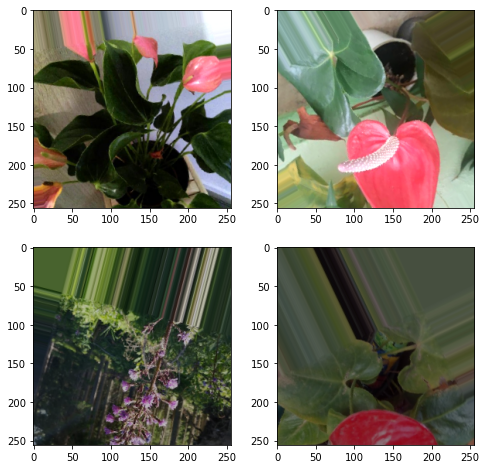

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i in range(batch_x.shape[0]):
    plt.subplot(2, 2, i+1)
    result = batch_x[i].astype('uint8')
    plt.imshow(result)

In [63]:
class_names = train_ds.class_names
print(class_names)

['1373231', '1393242', '1393414', '1396159', '1409238', '1411462', '1412445', '1413751', '1414746', '1418140']


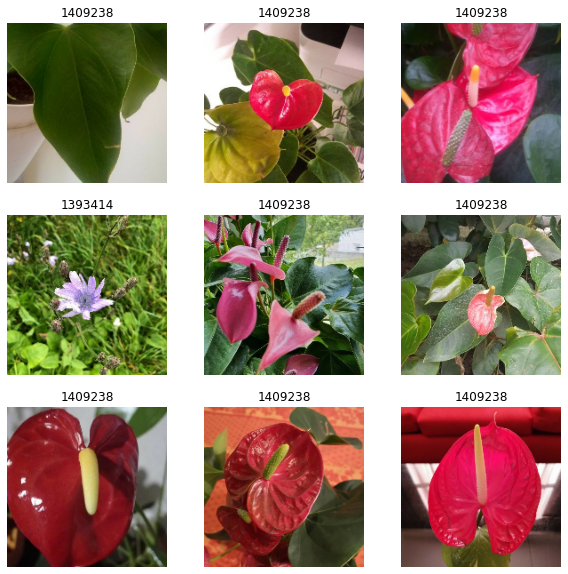

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Image datagenerator

In [65]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [66]:
datagen.fit(train_ds)

TypeError: float() argument must be a string or a number, not 'BatchDataset'

In [10]:
model = tfimm.create_model("vit_tiny_patch16_224", dtype="float32", pretrained=False)

In [ ]:
tfimm.

In [11]:
type(model)

tfimm.architectures.vit.ViT

In [7]:
tfimm.list_models()

['cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gmixer_12_224',
 'gmixer_24_224',
 'gmlp_b16_224',
 'gmlp_s16

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)